In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data from different markets
df1 = pd.read_excel('D:\Darkweb Data\dnmarchives\silkroad2.tar\mastersr2.xlsx')
df2 = pd.read_excel('D:\Darkweb Data\dnmarchives\hydra.tar\masterhydra.xlsx')
df2 = df2.drop('url', axis=1)

# Combine dataframes
dfdnm = pd.concat([df1, df2])

dfdnm.to_excel(r'D:\Darkweb Data\dnmarchives\masterdarknet.xlsx', index = False)

In [15]:
dfdnm.head()

,Title,Sellerid,PriceUSD,PriceBTC,Rating,Reviews,Origin,Destination,Category,Subcategory,Market,Date,Origin_region
0,Ray Ban Tech RB3460 001 Aviator/Flip Out/ Sung...,FoxyGirl,61.1615,0.098232,NaN,NaN,China,Worldwide,Apparel,NaN,SilkRoad2,2014-07-17,Asia
1,Ray Ban RB3025 Aviator Classic Sunglasses Replica,FoxyGirl,37.9626,0.060972,NaN,NaN,China,Worldwide,Apparel,NaN,SilkRoad2,2014-07-17,Asia
2,Rolex - Watch Box (AAA Grade Replica),RepAAA,100.43,0.161301,NaN,NaN,China,Worldwide,Apparel,NaN,SilkRoad2,2014-07-17,Asia
3,Ray Ban RB3016 - W0365 | Clubmaster Sunglasses...,FoxyGirl,45.3438,0.072827,NaN,NaN,China,Worldwide,Apparel,NaN,SilkRoad2,2014-07-17,Asia
4,Rolex - Submariner 2Tone YG/SS Black [Replica],RepAAA,149.635,0.24033,NaN,NaN,China,Worldwide,Apparel,NaN,SilkRoad2,2014-07-17,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75918,French Guide : Le carding de A à Z,Hackyboy,40.00,0.06867660,4.3,NaN,NaN,Worldwide,Digital Goods,NaN,Hydra,2014-08-05,NaN
75919,"PORN PASSES! - Lifetime Access to Brazzers, Mo...",MagicHat,10.00,0.01716915,4.8,NaN,NaN,Worldwide,Digital Goods,NaN,Hydra,2014-08-05,NaN
75920,LiveJasmin.com [Lifetime Account] Access the B...,MagicHat,10.00,0.01716915,4.8,NaN,United States,Worldwide,Digital Goods,NaN,Hydra,2014-08-05,North America
75921,Passion-Hd.com Account - [LIFETIME PORN PREMIU...,NotoSeller,5.00,0.00858458,5.0,NaN,NaN,Worldwide,Digital Goods,NaN,Hydra,2014-08-05,NaN


#### Standardise Values Across Markets
There are cases of alternative spelling and classification differences across the markets so it is best to create dictionaries to map these to standardised values. Using a dictionary is both faster than iterating over rows to replace values and will allow us to more easily add data from other sources in future.

In [27]:
region_dict = {
    
    'Unknown': 'Unknown',
    'China': 'Asia',
    'Hong Kong, (China)': 'Asia',
    'Undeclared': 'Unknown',
    'India': 'Asia',
    'Canada': 'North America',
    'United States': 'North America',
    'Netherlands': 'EU',
    'United Kingdom': 'EU',
    'Germany': 'EU',
    'Belgium': 'EU',
    'South Africa': 'Africa',
    'Australia': 'Oceania',
    'Spain': 'EU',
    'Czech Republic': 'EU',
    'Sweden': 'EU',
    'Finland': 'EU',
    'New Zealand': 'Oceania',
    'Norway': 'Non-EU Europe',
    'Poland': 'EU',
    'Austria': 'EU',
    'Switzerland': 'Non-EU Europe',
    'Denmark': 'EU',
    'Ireland': 'EU',
    'Italy': 'EU',
    'Bulgaria': 'EU',
    'Slovenia': 'EU',
    'Armenia': 'Non-EU Europe',
    'Slovakia': 'EU',
    'Latvia': 'EU',
    'France': 'EU',
    'Hungary': 'EU',
    'Singapore': 'Asia',
    'Germany\n]': 'EU',
    'Colombia': 'Latin America',
    'Malaysia': 'Asia',
    'Israel': 'Middle East',
    'Japan': 'Asia',
    'Vatican (Holy See)': 'EU',
    'Angola': 'Africa',
    'Greece': 'EU',
    'Paraguay': 'Latin America',
    'Albania': 'Non-EU Europe',
    'Panama': 'Latin America',
    'Luxembourg': 'EU',
    'Kosovo': 'Non-EU Europe',
    'Mexico': 'North America',
    'Monaco': 'EU',
    'Argentina': 'Latin America',
    'Bolivia': 'Latin America',
    'Ukraine': 'Non-EU Europe',
    'Croatia': 'EU',
    'Denmark': 'EU',
    'Lithuania': 'EU',
    'Romania': 'EU',
    'Reunion': 'Africa',
    'Saint Martin': 'Latin America',
    'Moldova': 'Non-EU Europe',
    'Central America': 'Latin America',
    'Tuvalu': 'Oceania',
    'Thailand': 'Asia',
    'Afghanistan': 'Asia',
    'European union': 'EU',
    'Belgium': 'EU',
    'Spain': 'EU', 
    'Hungary': 'EU',
    'Philippines': 'Asia'
     
}

country_dict = {
    'China': 'China',
    'Hong Kong, (China)': 'China',
    'Undeclared': 'Unknown',
    'India': 'India',
    'Canada': 'Canada',
    'United States': 'United States',
    'Netherlands': 'Netherlands',
    'United Kingdom': 'United Kingdom',
    'Germany': 'Germany',
    'Belgium': 'Belgium',
    'South Africa': 'South Africa',
    'Australia': 'Australia',
    'Spain': 'Spain',
    'Czech Republic': 'Czech Republic',
    'Sweden': 'Sweden',
    'Finland': 'Finland',
    'New Zealand': 'New Zealand',
    'Norway': 'Norway',
    'Poland': 'Poland',
    'Austria': 'Austria',
    'Switzerland': 'Switzerland',
    'Denmark': 'Denmark',
    'Ireland': 'Ireland',
    'Italy': 'Italy',
    'Bulgaria': 'Bulgaria',
    'Slovenia': 'Slovenia',
    'Armenia': 'Armenia',
    'Slovakia': 'Slovakia',
    'Latvia': 'Latvia',
    'France': 'France',
    'Hungary': 'Hungary',
    'Singapore': 'Singapore',
    'Germany\n]': 'Germany',
    'Colombia': 'Colombia',
    'Malaysia': 'Malaysia',
    'Israel': 'Israel',
    'Japan': 'Japan',
    'Vatican (Holy See)': 'Holy See',
    'Angola': 'Angola',
    'Greece': 'Greece',
    'Paraguay': 'Paraguay',
    'Albania': 'Albania',
    'Panama': 'Panama',
    'Luxembourg': 'Luxembourg',
    'Kosovo': 'Kosovo',
    'Mexico': 'Mexico',
    'Monaco': 'Monaco',
    'Argentina': 'Argentina',
    'Bolivia': 'Bolivia',
    'Ukraine': 'Ukraine',
    'Croatia': 'Croatia',
    'Denmark / UK (Top #4 Seller)': 'United Kingdom',
    'Lithuania': 'Lithuania',
    'Romania': 'Romania',
    'Reunion (FR)': 'Reunion',
    'Saint Martin (FR)': 'Saint Martin',
    'Moldova, Republic of': 'Moldova',
    'Central America': 'Central America',
    'Tuvalu': 'Tuvalu',
    'Thailand': 'Thailand',
    'Afghanistan': 'Afghanistan',
    'European union': 'EU',
    'Belgium': 'Belgium',
    'Spain': 'Spain', 
    'Hungary': 'Hungary',
    'Philippines': 'Philippines'
}

destination_dict = {
    'Worldwide': 'Worldwide',
    'Canada': 'Canada',
    'United States': 'United States',
    'Worldwide except Australia': 'Worldwide ex AUS',
    'European Union': 'EU',
    'Undeclared': 'Undeclared',
    'Australia': 'Australia',
    'Sweden': 'Sweden',
    'Germany': 'Germany',
    'United Kingdom': 'United Kingdom',
    'United States &amp; Canada': 'United States and Canada', 
    'New Zealand': 'New Zealand',
    'Norway': 'Norway',
    'Finland': 'Finland',
    'Ireland': 'Ireland',
    'China': 'China',
    'Switzerland': 'Switzerland',
    'Denmark': 'Denmark',
    'Azerbaijan': 'Azerbaijan',
    'Netherlands': 'Netherlands',
    'Italy': 'Italy',
    'France': 'France',
    'European Union / UK / Worldwide': 'Worldwide',
    'Worldwide\n ]': 'Worldwide',
    'United States & Canada': 'United States and Canada',
    'Argentina': 'Argentina',
    'Mexico': 'Mexico',
    'Japan': 'Japan',
    'Tuvalu': 'Tuvalu',
    'Belgium': 'Belgium',
    'Spain': 'Spain',
    'Hungary': 'Hungary',
    'Philippines': 'Philippines'
}

category_dict = {
    'Apparel': 'Apparel',
    'Art': 'Art',
    'Books': 'Books',
    'Computer': 'Computer Equipment',
    'Custom': 'Custom Orders',
    'Digital': 'Digital Goods',
    'Drug': 'Drugs',
    'Cannabis': 'Cannabis',
    'Dissociatives': 'Dissociatives',
    'Ecstasy': 'Ecstacy',
    'Drugs': 'Drugs',
    'Opioids': 'Opioids',
    'Other': 'Other',
    'Precursors': 'Precursors',
    'Prescription': 'Prescription',
    'Psychedelics': 'Psychedelics',
    'Steriodpeds': 'Steroids',
    'Stimulants': 'Stimulants',
    'Electronics': 'Electronics',
    'Erotica': 'Erotica',
    'Forgeries': 'Forgeries',
    'Hardware': 'Hardware',
    'Herbs': 'Supplements',
    'Jewelry': 'Jewelry',
    'Lab': 'Lab Supplies',
    'Lotteries': 'Lottery Games',
    'Medical': 'Drug Paraphernalia',
    'Money': 'Money',
    'Packaging': 'Packaging',
    'Services': 'Services',
    'Writing': 'Writing',
    'Collectibles': 'Collectibles',
    'Biotic': 'Supplements',
    'Benzos': 'Benzos',
    'Steroids': 'Steroids',
    'Tabacco': 'Tobacco',
    'Weapons': 'Weapons',
    'Others': 'Others',
    'Custom Orders': 'Custom Orders',
    'Drug Paraphernalia': 'Drug Paraphernalia',
    'Digital Goods': 'Digital Goods'
}

subcategory_dict = {
    'Materials': 'Materials',
    'Equipment': 'Equipment',
    'Orders': 'Custom Orders', 
    'Goods': 'Digital Goods',
    'Paraphernalia': 'Drug Paraphernalia',
    'Clones': 'Cuttings',
    'Concentrates': 'Concentrates',
    'Cuttings': 'Cuttings',
    'Edibles': 'Edibles',
    'Hash': 'Hash',
    'Pre': 'Weed',
    'Seeds': 'Seeds',
    'Shake': 'Shake',
    'Synthetic': 'Synthetic',
    'Topicals': 'Topical',
    'Trim': 'Trim',
    'Weed': 'Weed',
    'Dioscorea': 'Dioscorea',
    'Ketamine': 'Ketamine',
    'Mxe': 'MXE',
    'Pcp': 'PCP',
    '5mapb': '5-MAPB',
    'Butylone': 'Butylone',
    'Ethylone': 'Ethylone',
    'Mdai': 'MDAI',
    'Mda': 'MDA',
    'Mdma': 'MDMA',
    'Methylone': 'Methylone',
    'Mpa': 'MPA',
    'Pentedrone': 'Pentedrone',
    'Pills': 'Pills',
    'Ah': 'AH',
    'Heroin': 'Heroin',
    'Kratom': 'Kratom',
    'Opium': 'Opium',
    'Barbiturates': 'Barbiturates',
    'Intoxicants': 'Intoxicants',
    "Maoi's": 'MAOI',
    'Nootropics': 'Nootropics',
    "Ssri's": 'Antidepressant',
    'Supplements': 'Supplements',
    'Tobacco': 'Tobacco',
    'Analgesics': 'Analgesic',
    'Antidepressant': 'Antidepressant',
    'Generalhealth': 'General',
    'Relaxants': 'Relaxant',
    'Sildenafilcitrate': 'ED',
    'Stimulants': 'Stimulants',
    '2cfamily': '2C',
    '4acofamily': '4-ACO',
    '4hofamily': '4-HO',
    '5meofamily': '5-MEO',
    'Allad': 'AL-LAD',
    'Bufotenin': 'Bufotenin',
    'Dmt': 'DMT',
    'Dox': 'DOx',
    'Dpt': 'DPT',
    'Entheogens': 'Entheogen',
    'Lsa': 'LSA',
    'Lsd': 'LSD',
    'Lsz': 'LSZ',
    'Met': 'MET',
    'Nbome': 'NBOMe',
    'Salvia': 'Salvia',
    'Shrooms': 'Mushrooms',
    'Anabolicsteroids': 'Anabolic',
    'Antagonists': 'Antagonist',
    'Aromataseinhibitors': 'Aromatase Inhibitors', 
    'Clenbuterol': 'Clenbuterol',
    'Drostanolone': 'Anabolic',
    'Fluoxymesterone': 'Anabolic',
    'Hcg': 'HCG',
    'Humangrowthhormones': 'HGH',
    'Mesterelone': 'Anabolic',
    'Methandrostenolone': 'Anabolic',
    'Stanozolol': 'Anabolic',
    '2dpmp': '2-DPMP',
    '4emc': '4-EMC',
    '4mec': '4-MEC',
    '5apb': '5-APB',
    '6apb': '6-APB',
    'Apvp': 'APVP',
    'Cocaine': 'Cocaine',
    'Dimethocaine': 'DMC',
    'Ephedrine': 'Ephedrine',
    'Ethylphenidate': 'Ethylphenidate', 
    'Mdppp': 'MDPPP',
    'Mdpv': 'MDPV',
    'Mephedrone': 'Mephedrone',
    'Methamphetamine': 'Methamphetamine',
    'Speed': 'Amphetamine',
    'Digital': 'Digital',
    'Physical': 'Physical',
    'Supplies': 'Supplies',
    'Games': 'Games',
    'Methoxyketamine': 'Methoxyketamine',
    '3dmmc': '3-DMMC',
    '5it': '5-IT',
    'Amt': 'AMT',
    'Caffeine': 'Caffeine',
    'Tiletamine': 'Tiletamine',
    'Benzedrine': 'Benzedrine',
    'Cocaleaves': 'Coca Leaves',
    'Scopolamine': 'Scopolamine',
    'Fmcs': 'FMCS',
    'Ethylketamine': 'Ethylketamine',
    'Pentylone': 'Pentylone',
    'Agonists': 'Agonist',
    'Antidotes': 'Antidote',
    'Dxm': 'DXM',
    'Synthetics': 'Synthetic',
    'Others': 'Others',
    'Ecstasy': 'Ecstacy',
    'MDMA': 'MDMA', 
    'Opioids': 'Opioids',
    'Dissociatives': 'Dissociatives',
    'GHB': 'GHB',
    'LSD': 'LSD',
    'DMT': 'DMT',
    'Mescaline': 'Mescaline',
    'Mushrooms': 'Mushrooms',
    'Meth': 'Methamphetamine',
    'Prescription': 'Prescription', 
    'Benzos': 'Benzos',
    'Steroids': 'Steroids',
    'Services': 'Services',
    'Tabacco': 'Tobacco',
    'Weapons': 'Weapons',
    'Arms': 'Firearms',
    'Explosives': 'Explosives',
    'Ammo': 'Ammo',
    'Custom Orders': 'Custom Orders',
    'Drug Paraphernalia': 'Paraphernalia',
    'Scales': 'Scales',
    'Rolling Supplies': 'Rolling Supplies',
    'Pipes': 'Pipes',
    'Machinery': 'Machinery',
    'Bongs': 'Bongs',
    'Apparel': 'Apparel',
    'Sunglasses': 'Sunglasses',
    'Handbags': 'Handbags',
    'Watches': 'Watches',
    'Digital Goods': 'Digital',
    'E-Books': 'E-Books',
    'Money': 'Money',
    'Erotica': 'Erotica',
    'Accessories': 'Accessories',
    'OthersPsychedelics': 'Others'
}


# Map keys to values
dfdnm['Origin'] = dfdnm['Origin'].map(country_dict)
dfdnm['Origin_region'] = dfdnm['Origin'].map(region_dict)
dfdnm['Destination'] = dfdnm['Destination'].map(destination_dict)
dfdnm['Category'] = dfdnm['Category'].map(category_dict)
dfdnm['Subcategory'] = dfdnm['Subcategory'].map(subcategory_dict)
#dfdnm['Reviews'] = dfdnm['Reviews'].astype(str).astype(int)

In [22]:
#Remove duplicates with same title and scrape date. Necessary because some scrapes failed and needed to be restarted and sr2 listed items both in general category and specific subcategory
dfclean = dfdnm.drop_duplicates(subset=['Title','Date', 'Market'], keep='last')

#### Checking for Missing Data
There are a large proportion of null values in both the Rating and Review columns. Silkroad2 only implemented product reviews at a later date so the earlier scrapes have no such information. Due to the changing structure of the HTML files over time some of the information from listings was incorrect with values ending up in different/incompatible columns which may explain the missingness in Origin, Destination and Origin_region.

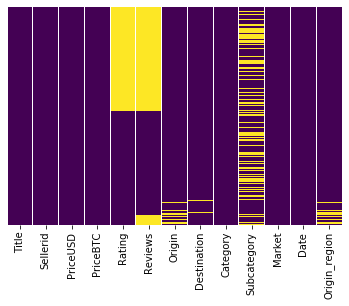

In [6]:
sns.heatmap(dfclean.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis')

#### Cocaine Data Refinement

In [28]:
cocaina = dfclean['Subcategory'] == 'Cocaine'
dfcoca = dfclean[cocaina]

In [30]:
dfcoca['Origin'].value_counts()

United States     1236
United Kingdom    1221
Netherlands        788
Australia          750
Unknown            579
Germany            556
Canada             394
Belgium            124
Sweden              77
Spain               76
Colombia            55
Italy               50
Switzerland         46
Mexico              44
Norway              37
China               37
Croatia             33
New Zealand         31
France              26
Ireland             20
Denmark             19
Bolivia              8
Luxembourg           7
Finland              4
Austria              4
Hungary              4
Greece               3
Czech Republic       3
Thailand             3
Argentina            2
Panama               1
Saint Martin         1
Name: Origin, dtype: int64